In [1]:
import pandas as pd
import numpy as np
#Data plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# from sklearn
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


#### LOADING THE DATASET

In [2]:
data = pd.read_csv('ma3route_crashes_algorithmcode.csv')
data.head(20)

,crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
0,1,06/06/2018 20:39,06/06/2018,-1.263030,36.764374,1,0,0,0,0
1,2,17/08/2018 06:15,17/08/2018,-0.829710,37.037820,1,1,0,0,0
2,3,25/05/2018 17:51,25/05/2018,-1.125301,37.003297,1,0,0,0,0
3,4,25/05/2018 18:11,25/05/2018,-1.740958,37.129025,1,0,0,0,0
4,5,25/05/2018 21:59,25/05/2018,-1.259392,36.842321,1,1,0,0,0
5,6,26/05/2018 07:11,26/05/2018,-1.215499,36.835150,1,0,0,0,0
6,7,26/05/2018 07:42,26/05/2018,-1.372556,36.920491,1,1,0,0,0
7,8,26/05/2018 07:52,26/05/2018,-1.209940,36.833173,1,0,0,0,0
8,9,26/05/2018 11:51,26/05/2018,-1.314351,36.807909,1,0,0,0,0
9,10,26/05/2018 15:42,26/05/2018,-1.206788,36.854991,1,0,0,0,0


#### CLASS CREATION

In [3]:
#load the dataset
class DataUnderstanding:
    def __init__(self, data = None):
      self.df = data
    #Load Data
    def load_data(self,path):
      # Try reading with 'latin-1' encoding and specifying the delimiter as '\t'
      self.df = pd.read_csv(path, encoding='latin-1', delimiter='\t')
      return self.df
    def data_understanding(self):
      # First five rows of the dataset
      print('n\n\First five rows of the dataset')
      print('-' * 5)
      print(self.df.head())

      # Dataset Info
      print('n\n\Dataset Info')
      print('-' * 5)
      print(self.df.info())

      # Statistical Sumary of the dataset
      print('n\n\Stastical summary')
      print('-' * 5)
      print(self.df.describe())
# Total Null values per column
      print('\n\nNull values per column')
      print('-' * 5)
      print(self.df.isnull().sum())

      # Unique Values
      print("\n\nUNIQUE VALUES")
      print("-"*12)
      for col in self.df.columns:
          print(f"Column *{col}* has {self.df[col].nunique()} unique values")
          if self.df[col].nunique() < 12:
              print(f"Top unique values in the *{col}* include:")
              for idx in self.df[col].value_counts().index:
                  print(f"- {idx}")
          print("")

      # Total Duplicates in the dataset
      print('n\n\Total duplicated rows in the dataset')
      print('-'* 5)
      print(self.df.duplicated().sum())

In [4]:
data_understanding = DataUnderstanding()
df = data_understanding.load_data('ma3route_crashes_algorithmcode.csv')
data_understanding.data_understanding()

n
\First five rows of the dataset
-----
  crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
0  1,06/06/2018 20:39,06/06/2018,-1.26302986,36.7...                                                                                                                     
1  2,17/08/2018 06:15,17/08/2018,-0.829710012,37....                                                                                                                     
2  3,25/05/2018 17:51,25/05/2018,-1.12530079,37.0...                                                                                                                     
3  4,25/05/2018 18:11,25/05/2018,-1.740957808,37....                                                                                                                     
4  5,25/05/2018 21:59,25/05/2018,-1.259392311,36....                                                          

#### DATA CLEANING
In this section, we perform comprehensive data cleaning including handling missing values, outliers, duplicates, and ensuring data types are consistent.

In [5]:
#looking at the columns
df.columns

Index(['crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words'], dtype='object')

##### Handling Missing Values

In [6]:
#checking for missing values
df.isna().sum()

crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words    0
dtype: int64

Dataset has no missing values

##### Handling Duplicates

In [7]:
#checking for duplicates
df.duplicated().sum()

0

Dataset has no duplicated values

Uniformity

##### Handling Outliers

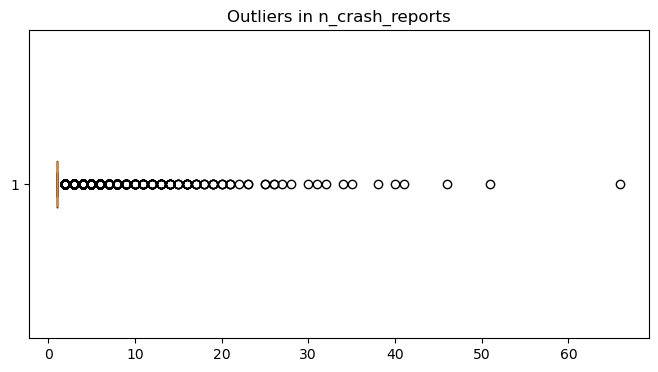

In [8]:
# Visualizing outliers in 'n_crash_reports'
plt.figure(figsize=(8, 4))
plt.boxplot(data['n_crash_reports'], vert=False)
plt.title('Outliers in n_crash_reports')
plt.show()

In [9]:
# Removing outliers using the IQR method
Q1 = data['n_crash_reports'].quantile(0.25)
Q3 = data['n_crash_reports'].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = (data['n_crash_reports'] >= (Q1 - 1.5 * IQR)) & \
                   (data['n_crash_reports'] <= (Q3 + 1.5 * IQR))
data = data[filter_outliers].reset_index(drop=True)

##### Correcting Data Types

In [10]:
# Converting date columns to datetime format
data['crash_date'] = pd.to_datetime(data['crash_date'], errors='coerce')
data['crash_datetime'] = pd.to_datetime(data['crash_datetime'], errors='coerce')

In [11]:
# Converting binary categorical columns to integer type
binary_columns = ['contains_fatality_words', 'contains_pedestrian_words',
                 'contains_matatu_words', 'contains_motorcycle_words']
for col in binary_columns:
    data[col] = data[col].astype(int)

##### Standardize Categorical Values


In [12]:
# Ensuring consistent labeling in categorical columns
data['contains_pedestrian_words'].replace({'yes': 1, 'no': 0}, inplace=True)

##### Handling Text and Keyword Based Columns

In [13]:
# Convert columns indicating presence of keywords (e.g., 'yes', 'no') to binary (1, 0)
text_indicators = ['contains_pedestrian_words', 'contains_matatu_words',
                  'contains_motorcycle_words']
for col in text_indicators:
    data[col] = data[col].apply(lambda x: 1 if x == 'yes' else 0)

##### Geospatial Cleaning

In [14]:
# Ensure latitude and longitude are within valid range for Kenya
valid_latitude = (data['latitude'] >= -4.7) & (data['latitude'] <= 5.0)
valid_longitude = (data['longitude'] >= 33.5) & (data['longitude'] <= 42.0)
data = data[valid_latitude & valid_longitude].reset_index(drop=True)

In [15]:
# Display cells with whitespace in specific columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Whitespace in column '{col}':")
    print(df[df[col].str.contains(r'^\s|\s$', na=False)][col])

Whitespace in column 'crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words':
Series([], Name: crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words, dtype: object)


In [16]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

#### Exploratory data anaylsis

#### Target variable anaylsis

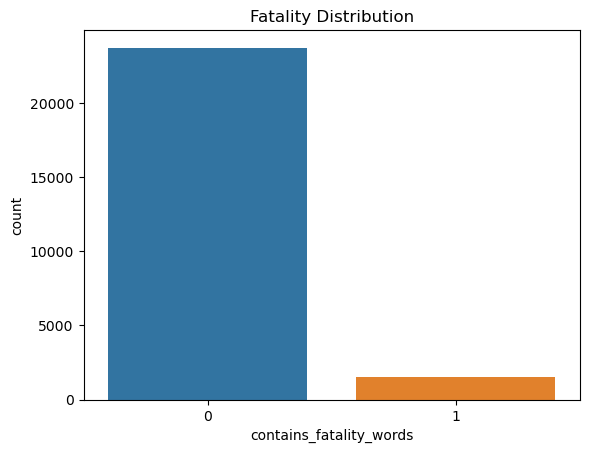

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.countplot(x='contains_fatality_words', data=data)
plt.title('Fatality Distribution')
plt.show()


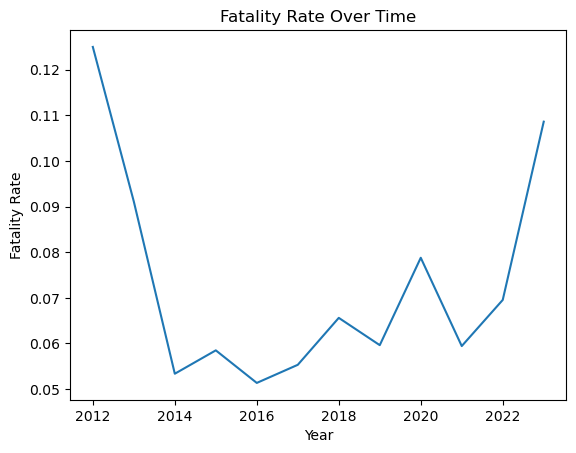

In [18]:
# Fatalities over time (e.g., per year)
data['crash_date'] = pd.to_datetime(data['crash_date'], errors='coerce')
data['year'] = data['crash_date'].dt.year
fatality_trend = data.groupby('year')['contains_fatality_words'].mean()

fatality_trend.plot(kind='line', title='Fatality Rate Over Time')
plt.ylabel('Fatality Rate')
plt.xlabel('Year')
plt.show()

#### Univariate Analysis

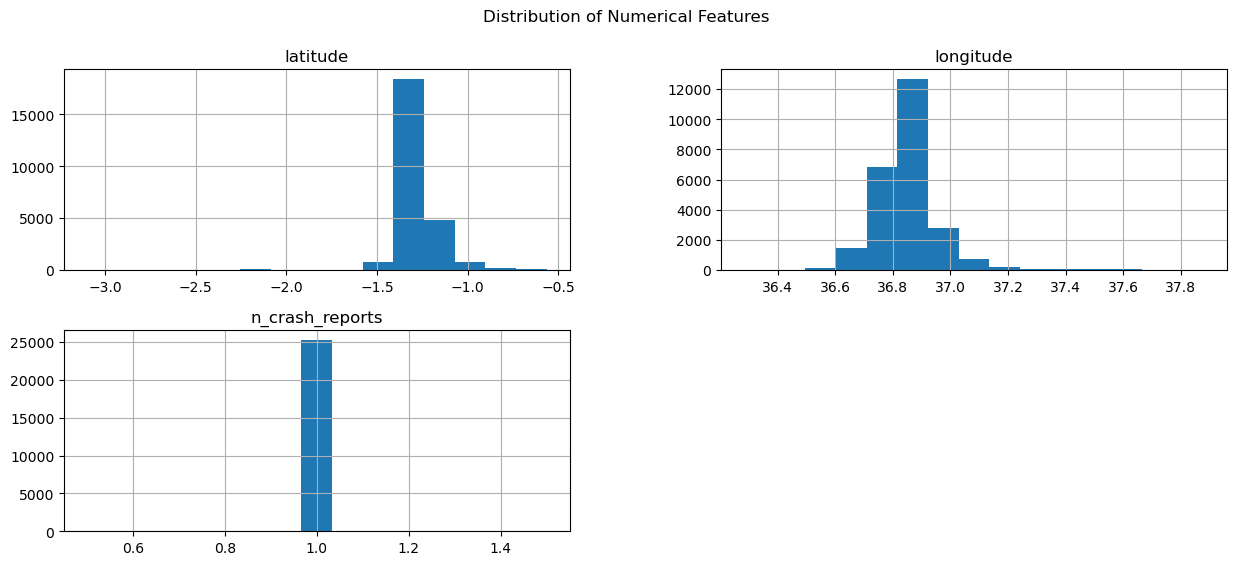

In [19]:
# Histogram for numerical features
numerical_features = ['latitude', 'longitude', 'n_crash_reports']
data[numerical_features].hist(bins=15, figsize=(15, 6))
plt.suptitle('Distribution of Numerical Features')
plt.show()

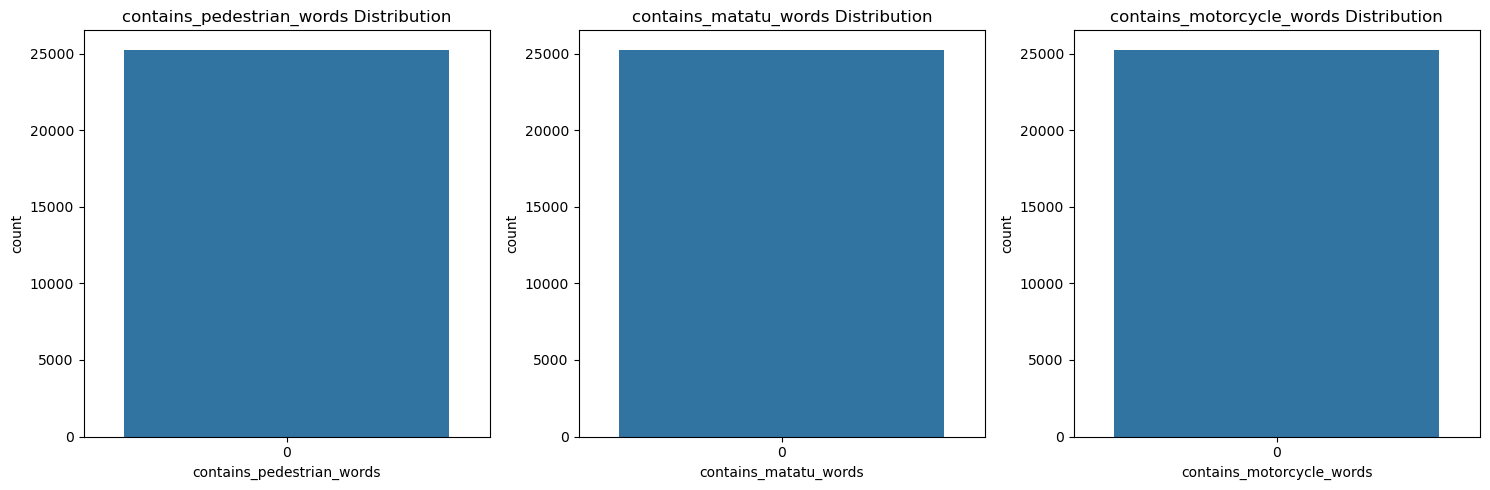

In [20]:
# Bar plots for categorical features
categorical_features = ['contains_pedestrian_words', 'contains_matatu_words',
                      'contains_motorcycle_words']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

#### Bivariate Analysis

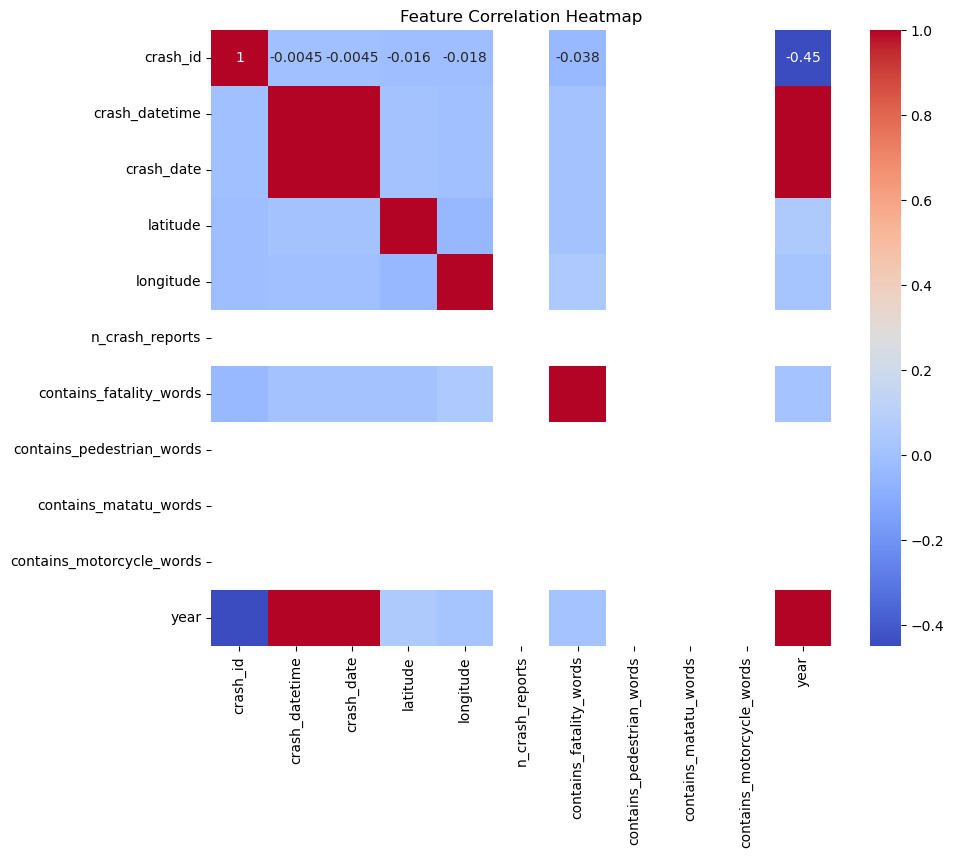

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

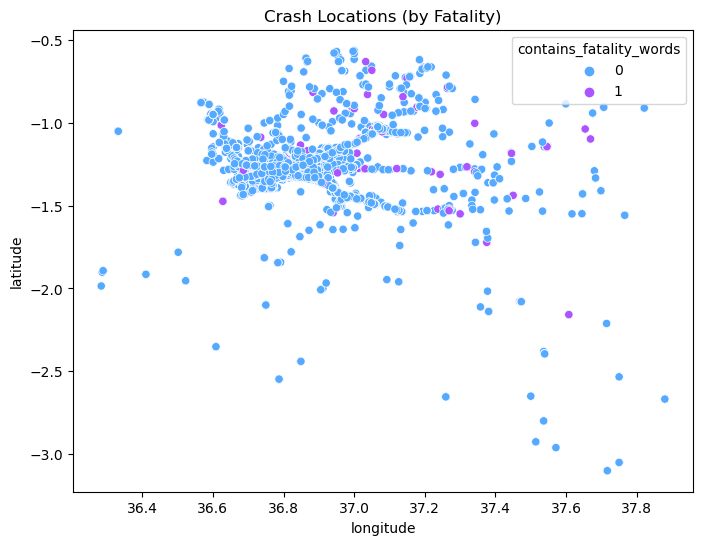

In [22]:
# Scatter plot: latitude vs. longitude
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='contains_fatality_words',
                data=data, palette='cool')
plt.title('Crash Locations (by Fatality)')
plt.show()

#### Multivariate Analysis

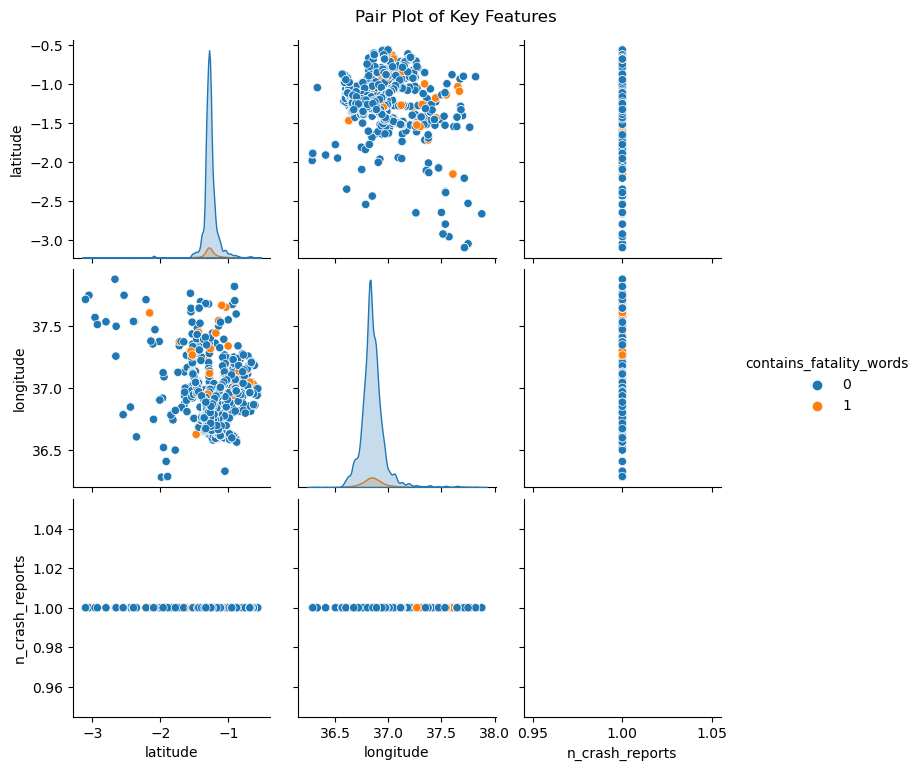

In [23]:
# Pair plot for key features with target variable
sns.pairplot(data, hue='contains_fatality_words',
             vars=['latitude', 'longitude', 'n_crash_reports'])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

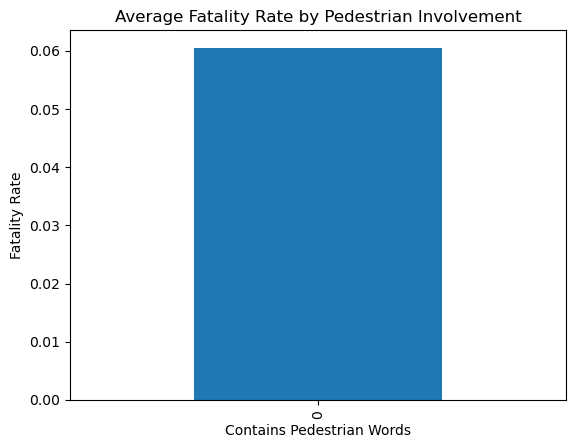

In [24]:
# Grouped analysis: mean fatality rate by contains_pedestrian_words
grouped = data.groupby('contains_pedestrian_words')['contains_fatality_words'].mean()
grouped.plot(kind='bar', title='Average Fatality Rate by Pedestrian Involvement')
plt.ylabel('Fatality Rate')
plt.xlabel('Contains Pedestrian Words')
plt.show()

#### Geospatial Analysis

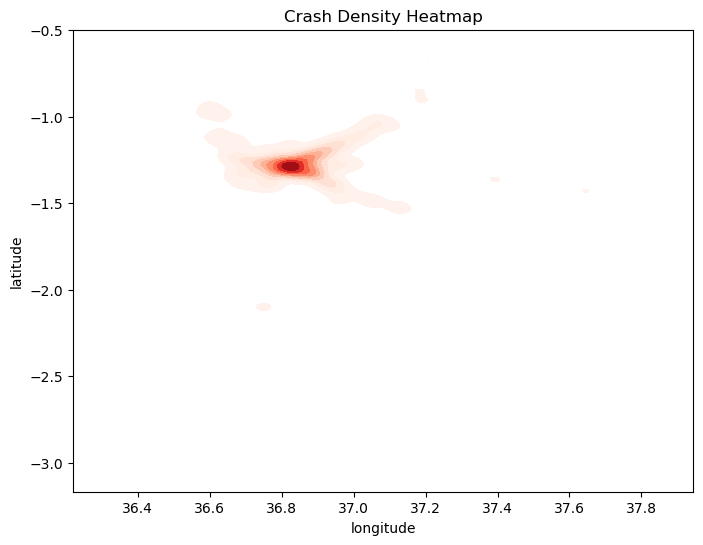

In [27]:
# Geospatial heatmap if geographic plotting libraries are available
# This could use a library like Folium for interactive maps
# Example code if folium were to be used:
import folium
from folium.plugins import HeatMap

# Alternatively, basic matplotlib scatter for location density
plt.figure(figsize=(8, 6))
sns.kdeplot(x='longitude', y='latitude', data=data, cmap='Reds', fill=True)
plt.title('Crash Density Heatmap')
plt.show()

#### Temporal Analysis

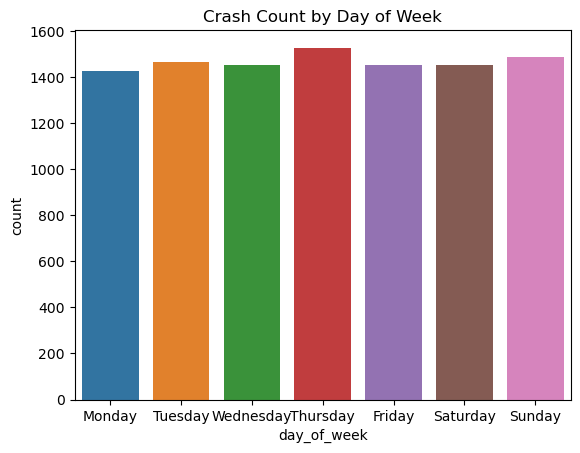

In [28]:
# Analyzing crash frequency over the days of the week
data['day_of_week'] = data['crash_date'].dt.day_name()

sns.countplot(x='day_of_week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crash Count by Day of Week')
plt.show()

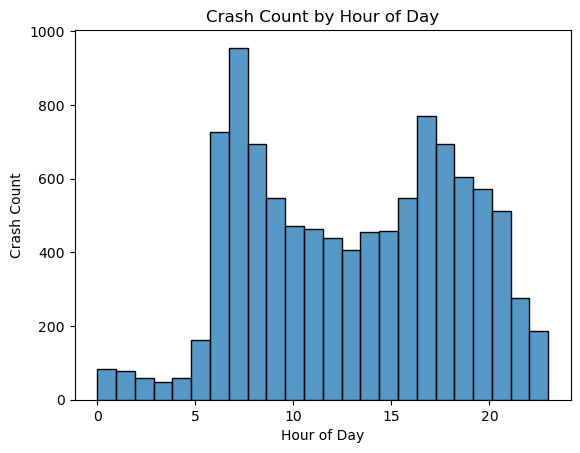

In [29]:
# Analyzing crash frequency by time of day
data['hour'] = data['crash_datetime'].dt.hour

sns.histplot(data['hour'], bins=24)
plt.title('Crash Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Crash Count')
plt.show()

#### FEATURE ENGINEERING
In this section, we create new features that may help improve model performance by capturing patterns in the data.

#### Date-Time Feature Engineering

In [30]:
# Convert crash_datetime to datetime and extract time components
data['crash_datetime'] = pd.to_datetime(data['crash_datetime'], errors='coerce')

# Extracting date-time features
data['hour'] = data['crash_datetime'].dt.hour
data['day'] = data['crash_datetime'].dt.day
data['weekday'] = data['crash_datetime'].dt.dayofweek
data['month'] = data['crash_datetime'].dt.month
data['year'] = data['crash_datetime'].dt.year
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Day-part feature
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

data['day_part'] = data['hour'].apply(categorize_time)

#### Spatial Features

In [31]:
# Example: calculating distance from a city center (e.g., Nairobi)
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# Calculate distance from Nairobi (approx latitude: -1.2921, longitude: 36.8219)
nairobi_lat, nairobi_lon = -1.2921, 36.8219
data['distance_to_nairobi'] = data.apply(lambda row: haversine(row['latitude'], row['longitude'], nairobi_lat, nairobi_lon), axis=1)

#### Traffic and Vehicle-Related Features

In [32]:
# Combining vehicle-related keywords into a single feature
data['contains_vehicle_words'] = data['contains_matatu_words'] | data['contains_motorcycle_words']

# Creating a severity indicator by combining fatality-related keywords
data['severity_index'] = data[['contains_fatality_words', 'contains_pedestrian_words']].sum(axis=1)

#### Crash Density Features

In [33]:
# Create a local crash density feature by counting crashes within a grid
from sklearn.neighbors import BallTree

# Using latitude and longitude
coords = np.radians(data[['latitude', 'longitude']])
tree = BallTree(coords, metric='haversine')

# Radius (5 km) in radians
radius = 5 / 6371  # Earth radius in km
data['local_crash_density'] = tree.query_radius(coords, r=radius, count_only=True) - 1

#### Seasonal and Environmental Features

In [34]:
# Season feature from month
def map_season(month):
    if month in [12, 1, 2]:
        return 'rainy'
    elif month in [6, 7, 8]:
        return 'dry'
    else:
        return 'transitional'

data['season'] = data['month'].apply(map_season)

#### Crash Report Aggregation Features

In [35]:
# Fatality mention ratio
region_counts = data.groupby('day_part')['contains_fatality_words'].mean()
data['fatality_mention_ratio'] = data['day_part'].map(region_counts)